# Newtonian Dynamics:
## Rectilinear motion in  1D
### At constant velovity (MRU):
$$x=v\,t$$
The purpose of the exercise is to generate data for x vs. t, and then compute numerically the velocity and acceleration

In [1]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt


In [64]:
#Generate a time vector
d_t0 = 0.1
t = np.arange(0,100,d_t0)

#Fix the velocity
v_0 = 3.

#Compute the x vector 
x = v_0*t


<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

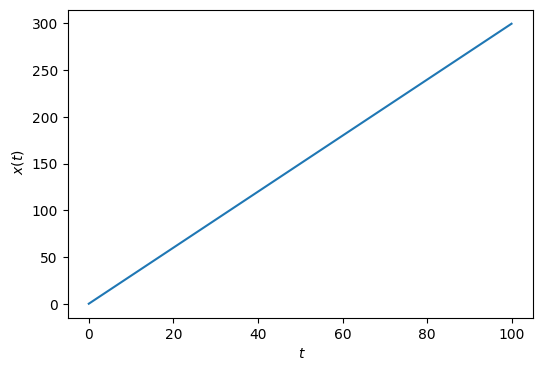

In [65]:
#Figure environment

plt.figure(figsize=(6,4))
plt.plot(t,x)
plt.xlabel(r" $t$" )
plt.ylabel(r" $x(t)$" )
plt.plot

### Velocity:
$$\dot{v_x}=\frac{dx}{dt}$$

### Method 1: Finite Differences (1st order)


In [66]:
x_diff = np.diff(x)
t_diff = np.diff(t)

print(x.shape,t.shape, x_diff.shape, t_diff.shape)

(1000,) (1000,) (999,) (999,)


In [67]:
#Compute derivative
vx_dot= x_diff/t_diff

#Midpoints
t_mid=0.5*(t[1:] + t[:-1])

print(t[:5])
print(t_mid[:5])

print(vx_dot.shape, t_mid.shape)

[0.  0.1 0.2 0.3 0.4]
[0.05 0.15 0.25 0.35 0.45]
(999,) (999,)


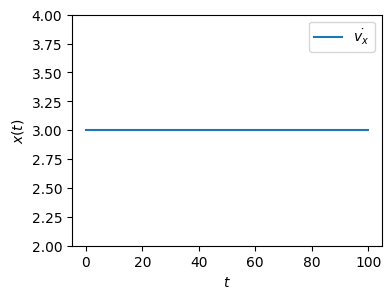

In [68]:
#Figure environment

plt.figure(figsize=(4,3))
plt.plot(t_mid,vx_dot, label= r"$\dot{v_x}$")

plt.xlabel(r"$t$")
plt.ylabel(r"$x(t)$")

plt.ylim(2,4)
plt.legend()
plt.show()

### Method 2: Finite Differences (2nd order)

In [69]:
#Fix the time delta
dt = t[1]-t[0]

print(dt)


0.1


In [70]:
#compute derivative (2nd order)

vx_dot2 = np.gradient(x,dt, axis=0)

print(vx_dot2.shape)

(1000,)


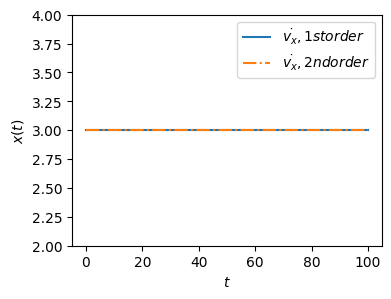

In [71]:
#Figure environment

plt.figure(figsize=(4,3))
plt.plot(t_mid,vx_dot, label= r"$\dot{v_x}, 1st order$")
plt.plot(t,vx_dot2, label= r"$\dot{v_x}, 2nd order$",linestyle= "-.")

plt.xlabel(r"$t$")
plt.ylabel(r"$x(t)$")

plt.ylim(2,4)
plt.legend()
plt.show()

## Error calculation

$$\epsilon = abs({v_0 - v_{numerical}})$$

In [72]:
#Theoretical arrays:
v_theo = np.full(len(t),v_0)
# print(v_theo[1:].shape, vx_dot.shape) #v_0

# print(v_theo[-1])

#Errors associated with both methods
e_1=abs(v_theo[1:]- vx_dot)
e_2=abs(v_theo- vx_dot2)

/tmp/ipykernel_9991/3909971939.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.plot(t_mid, np.log10(e_1), label=r"$\epsilon_1$")


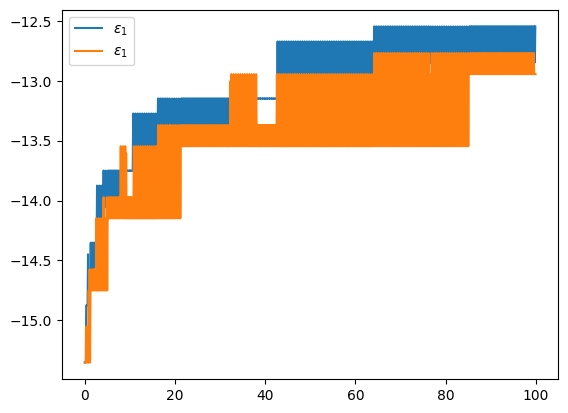

In [73]:
plt.figure()

plt.plot(t_mid, np.log10(e_1), label=r"$\epsilon_1$")
plt.plot(t, np.log10(e_2), label=r"$\epsilon_1$")
plt.legend()
plt.show()

### Average $L_1$ errors:


In [74]:
e_1t = np.mean(e_1)
e_2t = np.mean(e_2)

print("The first order error is:", e_1t)
print("The second order error is:", e_2t)

The first order error is: 9.933817754589999e-14
The second order error is: 6.060041357613955e-14


### Acceleration
$$a_x=\frac{d^2x}{dt^2}$$

In [76]:
#compute derivative (2nd order)

ax_dot2 = np.gradient(vx_dot2,dt, axis=0)

print(ax_dot2.shape)

(1000,)


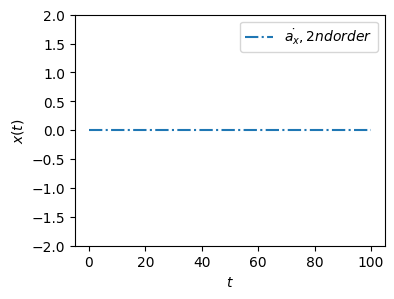

In [81]:
#Figure environment

plt.figure(figsize=(4,3))
plt.plot(t,ax_dot2, label= r"$\dot{a_x}, 2nd order$",linestyle= "-.")

plt.xlabel(r"$t$")
plt.ylabel(r"$x(t)$")

plt.ylim(-2,2)
plt.legend()
plt.show()

In [83]:
#Erros associated with both methods
a_0=0.
e_2=abs(a_0- ax_dot2)

/tmp/ipykernel_9991/3207023377.py:4: RuntimeWarning: divide by zero encountered in log10
  plt.plot(t, np.log10(e_2), label=r"$\epsilon_1$")


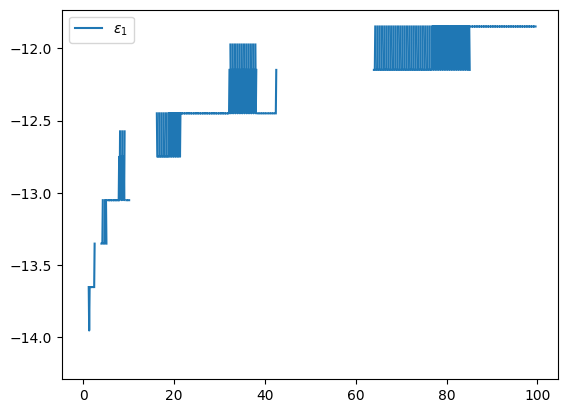

In [84]:
plt.figure()

# plt.plot(t_mid, np.log10(e_1), label=r"$\epsilon_1$")
plt.plot(t, np.log10(e_2), label=r"$\epsilon_1$")
plt.legend()
plt.show()

In [ ]:
e_a2t = np.mean(e_